
<div style="background: #000000;
            color: #00ffff;
            font-weight: bold;
            padding: 20px 40px;
            border-radius: 20px;
            text-align: center;
            font-size: 40px;
            border: 4px solid #00ffff;">
Final Grade Forecasting: Statistical Evaluation and Linear Regression Modeling
</div>


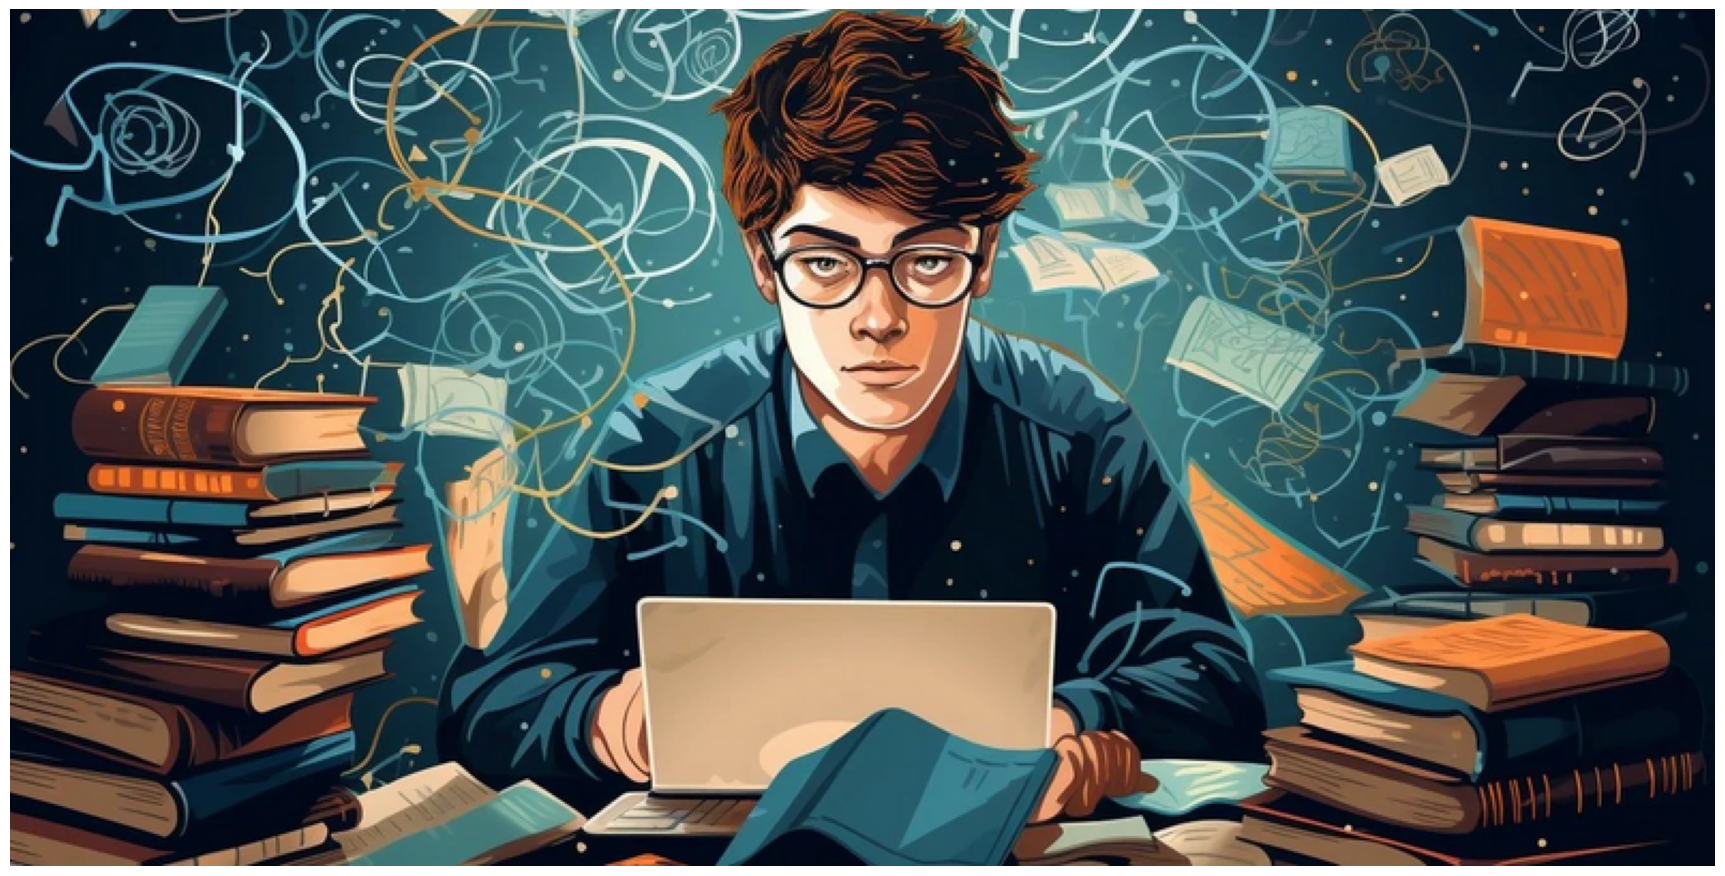

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


img = mpimg.imread(r"C:\Users\HP\OneDrive\Pictures\dataset-cover.jpg")

plt.figure(figsize=(22, 14))   # Bigger = larger image
plt.imshow(img)
plt.axis('off')

plt.show()

<div style="background: linear-gradient(135deg, #e3f2fd, #bbdefb);
            color: #0d47a1;
            font-weight: bold;
            padding: 18px 40px;
            border-radius: 12px;
            text-align: center;
            font-size: 34px;
            border-left: 8px solid #1976d2;
            margin: 20px 0;
            box-shadow: 0 4px 12px rgba(0,0,0,0.1);">
  📚 IMPORT LIBRARIES, ALGORITHMS, AND METRICS
</div>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder ,StandardScaler
from scipy import stats
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.metrics import mean_squared_error,r2_score

<div style="background-color: #000000; 
            color: #e10600; 
            font-weight: bold; 
            padding: 13px; 
            border-radius: 15px; 
            text-align: center; 
            font-size: 33px;">
 LOAD DATASET
</div>

In [3]:
df=pd.read_csv(r"C:\Users\HP\Downloads\student_data.csv")

In [4]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


<div style="background-color: #cce7ff; 
            color: #003366; 
            font-weight: bold; 
            padding: 13px; 
            border-radius: 15px; 
            text-align: center; 
            font-size: 33px;">
DATA-PREPROCESSING
</div>


<div style="background-color: #000000; 
            color: #e10600; 
            font-weight: bold; 
            padding: 13px; 
            border-radius: 15px; 
            text-align: center; 
            font-size: 33px;">
CHECKING SHAPE,COLUMNS,DESCRIBE,INFO,UNIQUE</div>


In [5]:
columns_to_drop = [
    'sex', 'age', 'Pstatus', 'guardian', 'traveltime',
    'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
    'higher', 'internet', 'romantic', 'Dalc', 'Walc',
    'failures', 'famrel', 'freetime', 'goout', 'health',
    'absences'
]

df = df.drop(columns=columns_to_drop)

In [6]:
df.shape

(395, 12)

In [7]:
df.columns

Index(['school', 'address', 'famsize', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'studytime', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
df.describe()

,Medu,Fedu,studytime,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2.749367,2.521519,2.035443,10.908861,10.713924,10.415190
std,1.094735,1.088201,0.839240,3.319195,3.761505,4.581443
min,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,8.000000,9.000000,8.000000
50%,3.000000,2.000000,2.000000,11.000000,11.000000,11.000000
75%,4.000000,3.000000,2.000000,13.000000,13.000000,14.000000
max,4.000000,4.000000,4.000000,19.000000,19.000000,20.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   school     395 non-null    object
 1   address    395 non-null    object
 2   famsize    395 non-null    object
 3   Medu       395 non-null    int64 
 4   Fedu       395 non-null    int64 
 5   Mjob       395 non-null    object
 6   Fjob       395 non-null    object
 7   reason     395 non-null    object
 8   studytime  395 non-null    int64 
 9   G1         395 non-null    int64 
 10  G2         395 non-null    int64 
 11  G3         395 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 37.2+ KB


In [10]:
for x in df:
    print(x)
    print(df[x].unique())
    print(df[x].nunique())

school
['GP' 'MS']
2
address
['U' 'R']
2
famsize
['GT3' 'LE3']
2
Medu
[4 1 3 2 0]
5
Fedu
[4 1 2 3 0]
5
Mjob
['at_home' 'health' 'other' 'services' 'teacher']
5
Fjob
['teacher' 'other' 'services' 'health' 'at_home']
5
reason
['course' 'other' 'home' 'reputation']
4
studytime
[2 3 1 4]
4
G1
[ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
17
G2
[ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]
17
G3
[ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  0  4]
18


In [11]:
df.isnull().sum()

school       0
address      0
famsize      0
Medu         0
Fedu         0
Mjob         0
Fjob         0
reason       0
studytime    0
G1           0
G2           0
G3           0
dtype: int64

<h2 style="background-color:yellow; color:black; text-align:center;
font-size:40px; font-weight:bold; padding:10px;">
CHECKING OUTLIERS
</h2>



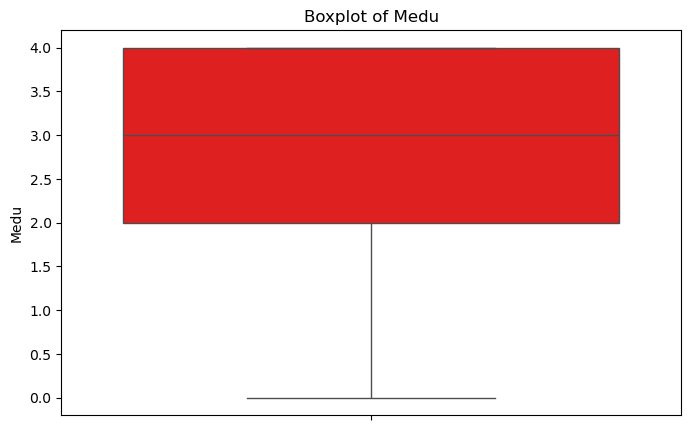

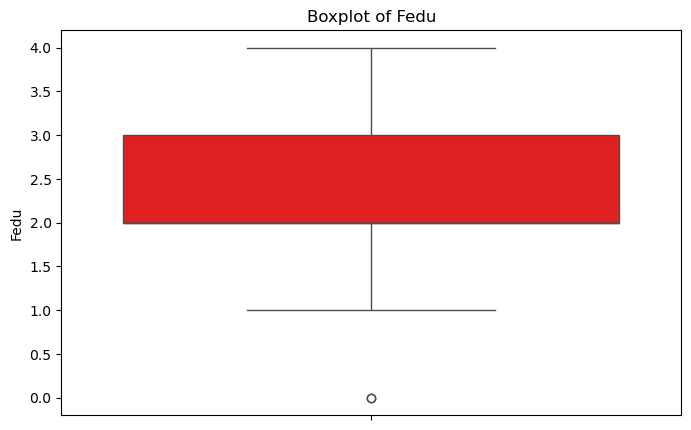

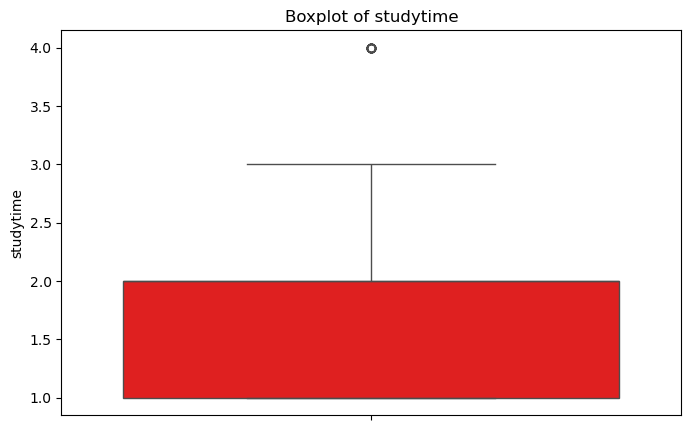

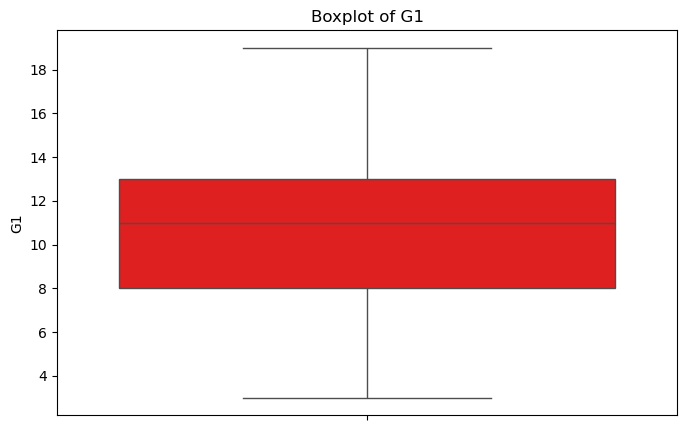

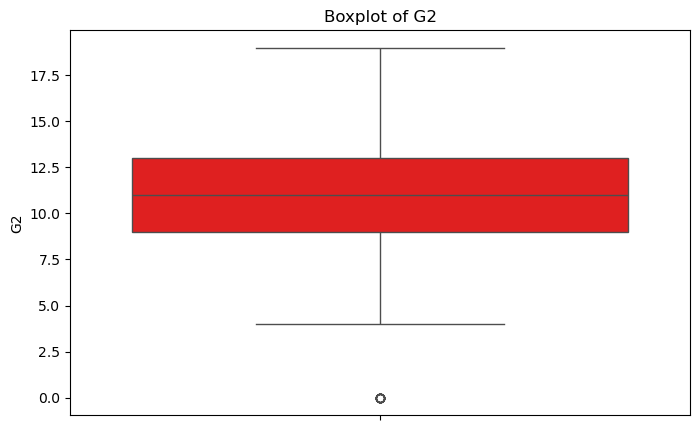

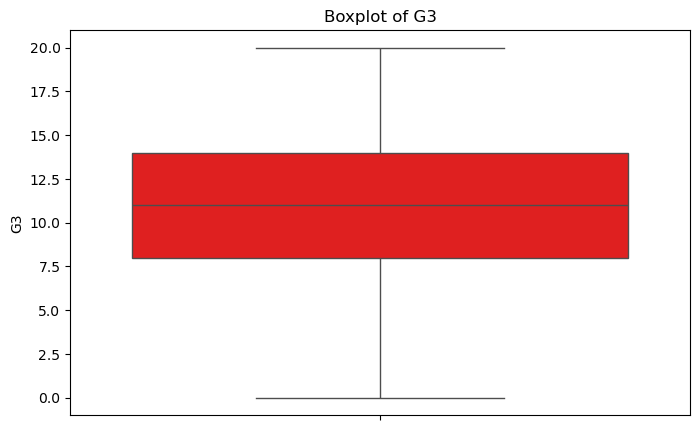

In [12]:
num_cols = ['Medu', 'Fedu', 'studytime', 'G1', 'G2', 'G3']
for col in num_cols:
    plt.figure(figsize=(8, 5))

    sns.boxplot(df[col],color='red')
    plt.title(f'Boxplot of {col}')
    plt.show()

<div style="background: linear-gradient(135deg, #fff9c4, #fff59d);
            color: #1a237e;
            font-weight: bold;
            padding: 20px 40px;
            border-radius: 15px;
            text-align: center;
            font-size: 38px;
            border-left: 10px solid #fbc02d;
            box-shadow: 0 6px 15px rgba(0,0,0,0.15);
            margin: 25px 0;">
  HYPOTHESIS TESTING
</div>


<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
  Z-Test
</div>


In [13]:
# 2. Keep only 10 columns
keep_cols = ['school', 'address', 'famsize', 'Medu', 'Fedu',
             'Mjob', 'Fjob', 'reason', 'G1', 'G2','studytime','G3']

df = df[keep_cols]

# 3. Simple z-test: Compare G1 between GP and MS schools
gp = df[df['school'] == 'GP']['G1']
ms = df[df['school'] == 'MS']['G1']

# Run z-test (two-sided)
z_stat, p_value = ztest(gp, ms)

# Print results
print("=== Z-test: G1 grades (GP vs MS) ===")
print(f"GP students: {len(gp)}    Mean = {gp.mean():.2f}")
print(f"MS students: {len(ms)}    Mean = {ms.mean():.2f}")
print(f"z-statistic: {z_stat:.3f}")
print(f"p-value:     {p_value:.3f}")

if p_value < 0.05:
    print("→ Significant difference between schools")
else:
    print("→ No significant difference (p > 0.05)")

=== Z-test: G1 grades (GP vs MS) ===
GP students: 349    Mean = 10.94
MS students: 46    Mean = 10.67
z-statistic: 0.510
p-value:     0.610
→ No significant difference (p > 0.05)


H₀ = "Schools are the same" ← This is what we accept

H₁ = "Schools are different" ← We couldn't prove this

<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
 T-Test</div>



In [14]:
# GP MS 
gp = df[df['school'] == 'GP']['G1']
ms = df[df['school'] == 'MS']['G1']

# t-test 
t_stat, p_value = stats.ttest_ind(gp, ms)

print("=== Independent t-test : G1 (GP vs MS) ===")
print(f"t-value     : {t_stat:.3f}")
print(f"p-value     : {p_value:.3f}")
print("Result      :", "Significant difference" if p_value < 0.05 else "No significant difference")

=== Independent t-test : G1 (GP vs MS) ===
t-value     : 0.510
p-value     : 0.610
Result      : No significant difference


#### The average G1 grades of students from GP and MS schools are not significantly different (p-value = 0.61 > 0.05), meaning both schools perform similarly in the first period.
#### This is an important finding for your project — it shows that the school itself (GP vs MS) does not strongly affect early academic performance in this dataset.


<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
  Chi2 Test
</div>



In [15]:

# Create cross table: school vs address
table = pd.crosstab(df['school'], df['address'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(table)

# Show results
print("=== Chi-square Test: school × address ===")
print("\nCross table:")
print(table)
print(f"\nChi-square value = {chi2:.3f}")
print(f"p-value          = {p:.4f}")
print(f"Degrees of freedom = {dof}")
print("\nResult:", 
      "Significant relationship (p < 0.05)" if p < 0.05 else "No significant relationship")

=== Chi-square Test: school × address ===

Cross table:
address   R    U
school          
GP       63  286
MS       25   21

Chi-square value = 28.862
p-value          = 0.0000
Degrees of freedom = 1

Result: Significant relationship (p < 0.05)


H₀ = "No relationship" → Rejected

H₁ = "There is a relationship" → Supported

<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
ANOVA</div>



In [16]:
# 2. Prepare groups: G2 grades for each mother's job category
groups = []
job_types = df['Mjob'].unique()  # ['at_home', 'health', 'other', 'services', 'teacher']

for job in job_types:
    group = df[df['Mjob'] == job]['G2'].dropna()
    groups.append(group)

# 3. Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

# 4. Show results
print("=== One-way ANOVA: G2 grades by Mother's Job (Mjob) ===")
print(f"Number of groups: {len(job_types)}")
print(f"F-statistic: {f_stat:.3f}")
print(f"p-value:     {p_value:.4f}")
print("-" * 50)

if p_value < 0.05:
    print("Result: Significant difference → At least one mother's job category has different average G2 grade")
else:
    print("Result: No significant difference between groups")

=== One-way ANOVA: G2 grades by Mother's Job (Mjob) ===
Number of groups: 5
F-statistic: 4.311
p-value:     0.0020
--------------------------------------------------
Result: Significant difference → At least one mother's job category has different average G2 grade


H₀ = "Everyone is the same"

H₁ = "Someone is different"


<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
Mann–Whitney U Test</div>


In [17]:
from scipy.stats import mannwhitneyu
# Study time groups
low_study = df[df['studytime'] <= 2]['G3']   # less study time
high_study = df[df['studytime'] > 2]['G3']   # more study time
# Mann-Whitney U Test
stat, p_value = mannwhitneyu(low_study, high_study, alternative='two-sided')

print("Mann-Whitney U Statistic:", stat)
print("P-value:", p_value)

# Result interpretation
if p_value < 0.05:
    print("Reject H0: Study time has a significant impact on grades")
else:
    print("Fail to Reject H0: No significant difference in grades")


Mann-Whitney U Statistic: 11315.5
P-value: 0.006046617554434771
Reject H0: Study time has a significant impact on grades


#### H0 (Null Hypothesis):
#### There is no significant difference in final grades between students with low and high study time.

#### H1 (Alternative Hypothesis):
#### There is a significant difference in final grades between students with low and high study time.

##### Mann–Whitney U Test was used to analyze the impact of study time on students’ final grades.
##### The results show a statistically significant difference in performance between students with low and high study time.


<h2 style="background-color:yellow; color:black; text-align:center;
    font-size:40px; font-weight:bold;padding:10px;">  ENCODING </h1>

In [18]:
label_cols = ['school', 'address', 'famsize', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'studytime', 'G1', 'G2','G3']


In [19]:
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [20]:
df

,school,address,famsize,Medu,Fedu,Mjob,Fjob,reason,G1,G2,studytime,G3
0,0,1,0,4,4,0,4,0,2,3,1,3
1,0,1,0,1,1,0,2,0,2,2,1,3
2,0,1,1,1,1,0,2,2,4,5,1,7
3,0,1,0,4,2,1,3,1,12,11,2,12
4,0,1,0,3,3,2,2,1,3,7,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,1,2,2,3,3,0,6,6,1,6
391,1,1,1,3,1,3,3,0,11,13,0,13
392,1,0,0,1,1,2,2,0,7,5,0,4
393,1,0,1,3,2,3,2,0,8,9,0,7


<h2 style="background-color: yellow; 
           color: black; 
           text-align: center;
           font-size: 40px; 
           font-weight: bold; 
           padding: 15px; 
           border-radius: 10px;">
  MODEL BUILDING
</h2>



<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
Scaling</div>


In [21]:
X = df[['school', 'address', 'famsize', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'studytime', 'G1', 'G2']]
y = df['G3']


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()

In [24]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test_scaled)

<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
F Test</div>


In [27]:
n = len(y_test)  
p = X_train.shape[1]

In [28]:
RSS = np.sum((y_test - y_pred) ** 2)

In [29]:
TSS = np.sum((y_test - np.mean(y_test)) ** 2)

In [30]:
ESS = TSS - RSS

In [31]:
MSE = RSS / (n - p - 1)

In [32]:
MSR = ESS / p

In [33]:
F_statistic = MSR / MSE

In [34]:
p_value = 1 - stats.f.cdf(F_statistic, p, n - p - 1)

In [35]:
print('F-statistic:', F_statistic)
print('p-value:', p_value)

F-statistic: 39.58751918650905
p-value: 1.1102230246251565e-16


In [36]:
if p_value < 0.05:
    print('The model is significant at the 5% significance level.')
else:
    print('The model is not significant at the 5% significance level.')

The model is significant at the 5% significance level.


In [37]:
MSE

np.float64(2.6646476375276182)

In [38]:
mse=mean_squared_error(y_test,y_pred)
mse

2.259891034358866

In [39]:
r2=r2_score(y_test,y_pred)
r2

0.8666567716840592

#### Linear Regression model is very good — using the features, it can predict G3 with 86.67% accuracy (R² = 0.8667), and the result is statistically highly significant (p-value is extremely close to zero, approximately 1.11 × 10⁻¹⁶)

# Student performance varies significantly across different demographic and academic factors. Study time and parental education levels play a major role in influencing student grades. Categorical attributes such as school type and family background impact academic outcomes. Outlier detection and statistical analysis strengthen confidence in observed patterns beyond visual exploration. The project demonstrates effective data preprocessing, outlier handling, and exploratory data analysis techniques. 